# MODELO GOMPERTZ

En este Notebook implementares el Modelo de crecimiento tumoral de Gompertz. Este Notebook se centra en la programación las explicaciones de las logicas de los parametros, conclusiones y explicaciones teoricas de los metodos se encontraran en el pdf del TFM.

Los datos reales que se van a utilizar son un invento simple, si se quisiera hacer con datos reales se tendria que traer los datos del momento en el que se ha medido el tumor y su tamaño.

Esto es un simple ejemplo, despues en un estudio con datos reales deberiamos amplificar estos con los datos que se tiene.

Para ello haremos tres partes distinta.

La primera sera encontrar la solución del modelo de gompertz y visualizar una solución concreta.

La segunda sera ver como encontrar los mejores parametros.

La tercera sera  como poder comprobar que el modelo es adecuado comparandolo con nuestros datos reales.

## SOLUCIÓN Y GRAFICA

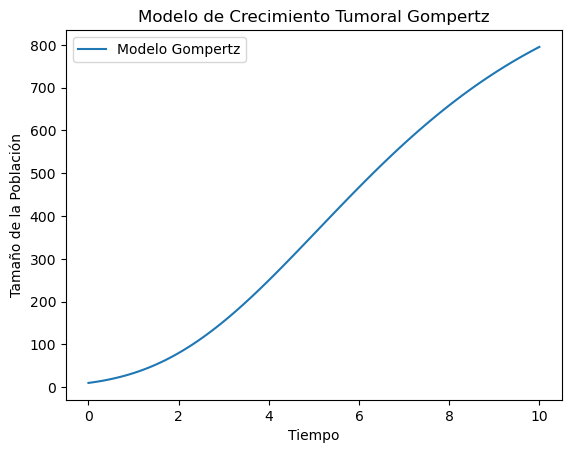

In [88]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Función que representa la ecuación diferencial del modelo Gompertz
def gompertz_model(t, N, r, K):
    dNdt = -r * N * np.log(N / K)
    return dNdt

# Parámetros del modelo Gompertz
r = 0.3  # Tasa de crecimiento máxima
K = 1000  # Capacidad de carga

# Condiciones iniciales
N0 = 10  # Tamaño inicial de la población
initial_conditions = [N0]

# Rango de tiempo
t_span = (0, 10)

# Resolver la ecuación diferencial utilizando solve_ivp
solution = solve_ivp(gompertz_model, t_span, initial_conditions, args=(r, K), dense_output=True)

# Generar puntos en el tiempo para la visualización
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Evaluar la solución en los puntos de tiempo para obtener la población en esos momentos
population_at_time_t_eval = solution.sol(t_eval)

# Visualizar los resultados
plt.plot(t_eval, population_at_time_t_eval[0], label='Modelo Gompertz')
plt.xlabel('Tiempo')
plt.ylabel('Tamaño de la Población')
plt.title('Modelo de Crecimiento Tumoral Gompertz')
plt.legend()

# Guardar la gráfica como una imagen (por ejemplo, PNG)
plt.savefig('modelo_gompertz.png')

# Mostrar la gráfica
plt.show()



Aunque sea un simple ejemplo se puede empezar a intuir la forma de S.

## AJUSTE DE PARAMETROS

### CURVE_FIT

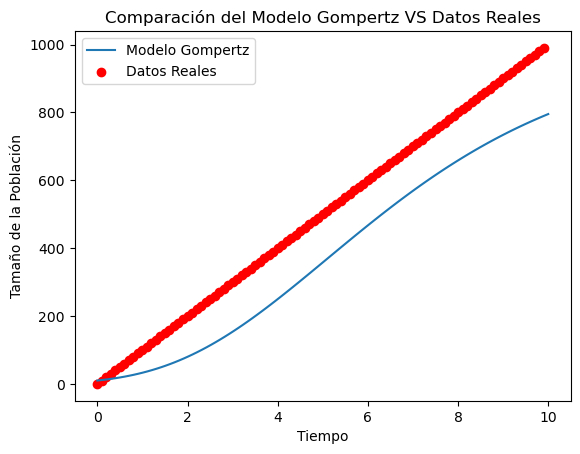

In [89]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Función que representa la ecuación diferencial del modelo Gompertz
def gompertz_model(t, N, r, K):
    dNdt = -r * N * np.log(N / K)
    return dNdt

# Condiciones iniciales
N0 = 10  # Tamaño inicial de la población

# Parámetros del modelo Gompertz verdaderos
true_r = 0.3
true_K = 1000

# Rango de tiempo
t_span = (0, 10)

# Resolver la ecuación diferencial utilizando solve_ivp para generar datos "reales"
solution = solve_ivp(gompertz_model, t_span, [N0], args=(true_r, true_K), dense_output=True)

# Generar puntos en el tiempo para la visualización
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Evaluar la solución en los puntos de tiempo para obtener la población en esos momentos
true_population_at_time_t_eval = solution.sol(t_eval)

# Visualizar los resultados
plt.plot(t_eval, true_population_at_time_t_eval[0], label='Modelo Gompertz')

# Datos Reales (t, N)
datos_reales = np.array([(i / 10, i * 10) for i in range(100)])
tiempos_reales, poblaciones_reales = zip(*datos_reales)
plt.scatter(tiempos_reales, poblaciones_reales, color='red', label='Datos Reales')

plt.xlabel('Tiempo')
plt.ylabel('Tamaño de la Población')
plt.title('Comparación del Modelo Gompertz VS Datos Reales')
plt.legend()

# Mostrar la gráfica
plt.show()





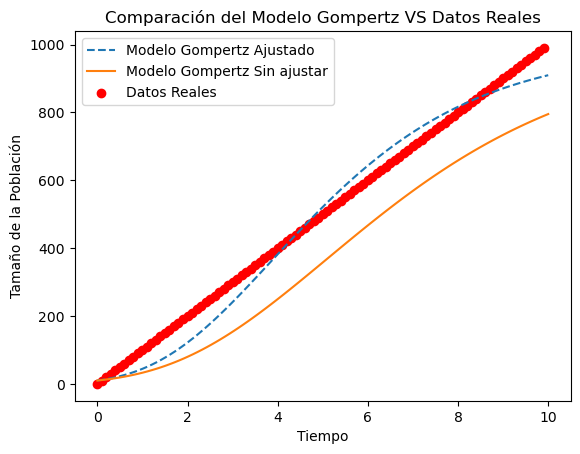

Parámetros ajustados (r, K): [3.92184972e-01 9.96330487e+02]


In [90]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Función que representa la ecuación diferencial del modelo Gompertz
def gompertz_model(t, N, r, K):
    if N <= 0:
        return 0
    else:
        dNdt = -r * N * np.log(N / K)
        return dNdt

# Condiciones iniciales
N0 = 10  # Tamaño inicial de la población

# Parámetros del modelo Gompertz primeros
true_r = 0.3
true_K = 1000

# Rango de tiempo
t_span = (0, 10)

# Resolver la ecuación diferencial utilizando solve_ivp para generar datos "reales"
solution = solve_ivp(gompertz_model, t_span, [N0], args=(true_r, true_K), dense_output=True)

# Generar puntos en el tiempo para la visualización
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Evaluar la solución en los puntos de tiempo para obtener la población en esos momentos
true_population_at_time_t_eval = solution.sol(t_eval)

# Datos Reales (t, N)
datos_reales = np.array([(i/10 , i * 10) for i in range(100)])
tiempos_reales, poblaciones_reales = zip(*datos_reales)

# Definir la función a ajustar con curve_fit
def gompertz_fit_function(t, r, K):
    N0 = 10  # Condiciones iniciales
    solution = solve_ivp(gompertz_model, t_span, [N0], args=(r, K), dense_output=True)
    return solution.sol(t)[0]

# Ajustar el modelo Gompertz a los datos observados utilizando curve_fit
params, covariance = curve_fit(gompertz_fit_function, tiempos_reales, poblaciones_reales)

# Generar la curva ajustada
fitted_curve = gompertz_fit_function(t_eval, *params)

# Visualizar los resultados
plt.plot(t_eval, fitted_curve, label='Modelo Gompertz Ajustado', linestyle='--')
plt.plot(t_eval, true_population_at_time_t_eval[0], label='Modelo Gompertz Sin ajustar')

# Datos Reales (t, N)
plt.scatter(tiempos_reales, poblaciones_reales, color='red', label='Datos Reales')

plt.xlabel('Tiempo')
plt.ylabel('Tamaño de la Población')
plt.title('Comparación del Modelo Gompertz VS Datos Reales')
plt.legend()

# Mostrar la gráfica
plt.show()

# Imprimir los parámetros ajustados
if np.any(np.isnan(params)):
    print("Falló el ajuste de la curva. Verifica los datos de entrada y las condiciones iniciales.")
    print("Matriz de covarianza:", covariance)
else:
    print("Parámetros ajustados (r, K):", params)





Se ve que con este metodo la ecuacion intenta asemejarse con los datos. Hay que tener en cuenta el significadao de cada parametro porque a veces aunque se ajuste bien, si el parametro no es logico no es valido el modelo.
 ES MUY IMPORTANTE QUE TENGAN SENTIDO!!!!

### METODOS DE MINIMOS CUADRADOS

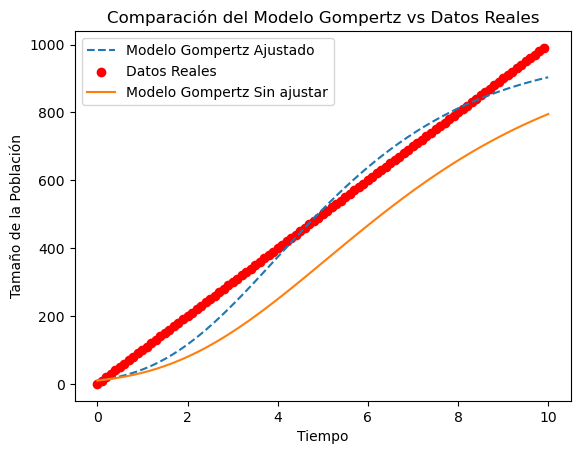

Parámetros ajustados (r, K): [3.99605439e-01 9.84026517e+02]


In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

# Función que representa la ecuación diferencial del modelo Gompertz
def gompertz_model(N, t, r, K):
    if N <= 0:
        return 0
    else:
        dNdt = -r * N * np.log(N / K)
        return dNdt

# Condiciones iniciales
N0 = 10  # Tamaño inicial de la población

# Parámetros del modelo Gompertz primero
true_r = 0.3
true_K = 1000

# Rango de tiempo
t_span = (0, 10)

# Resolver la ecuación diferencial de forma numérica para enseñar otra manera de resolver la ecuación diferencial
def integrate_gompertz(r, K, t_eval):
    N = np.zeros_like(t_eval)
    N[0] = N0
    for i in range(1, len(t_eval)):
        dt = t_eval[i] - t_eval[i-1]
        N[i] = N[i-1] + gompertz_model(N[i-1], t_eval[i-1], r, K) * dt
    return N

# Generar puntos en el tiempo para la visualización
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Datos Reales (t, N)
datos_reales = np.array([(i / 10, i * 10) for i in range(100)])
tiempos_reales, poblaciones_reales = zip(*datos_reales)

# Definir la función objetivo para mínimos cuadrados
def objective_function(params, t, data, t_eval):
    r, K = params
    fitted_curve = integrate_gompertz(r, K, t_eval)
    return fitted_curve - data

# Estimación inicial de los parámetros
initial_params = [0.1, 500]

# Minimizar la función objetivo utilizando least_squares
result = least_squares(objective_function, initial_params, args=(tiempos_reales, poblaciones_reales, t_eval))

# Obtener los parámetros ajustados
params = result.x

# Generar la curva ajustada
fitted_curve = integrate_gompertz(*params, t_eval)

# Visualizar los resultados
plt.plot(t_eval, fitted_curve, label='Modelo Gompertz Ajustado', linestyle='--')
plt.scatter(tiempos_reales, poblaciones_reales, color='red', label='Datos Reales')
plt.plot(t_eval, true_population_at_time_t_eval[0], label='Modelo Gompertz Sin ajustar')
plt.xlabel('Tiempo')
plt.ylabel('Tamaño de la Población')
plt.title('Comparación del Modelo Gompertz vs Datos Reales')
plt.legend()

# Mostrar la gráfica
plt.show()

# Imprimir los parámetros ajustados
print("Parámetros ajustados (r, K):", params)





Nos dan datos muy parecidos ahora podemos ver que tecnica es mejor para representar nuestro modelo y si las tecnicas son adecuadas. Primero vamos a ver una comparación de graficas para ver si hay mucha diferencia entre las dos.

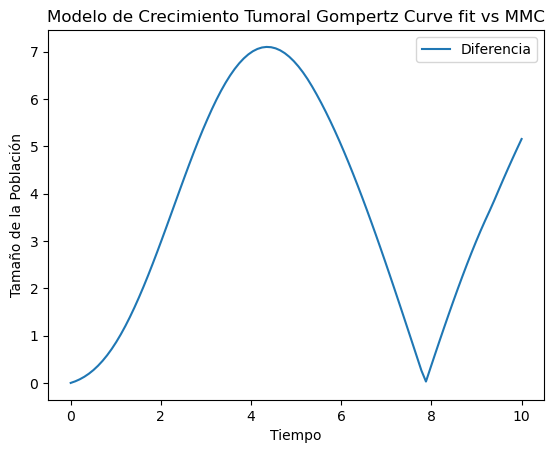

In [92]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Función que representa la ecuación diferencial del modelo Gompertz
def gompertz_model(t, N, r, K):
    dNdt = -r * N * np.log(N / K)
    return dNdt

# Parámetros del modelo Gompertz

r=3.92184972e-01 
K=9.96330487e+02
r1=3.99605439e-01 
K1=9.84026517e+02
# Condiciones iniciales
N0 = 10  # Tamaño inicial de la población
initial_conditions = [N0]

# Rango de tiempo
t_span = (0, 10)

# Resolver la ecuación diferencial utilizando solve_ivp
solution = solve_ivp(gompertz_model, t_span, initial_conditions, args=(r, K), dense_output=True)
solution1 = solve_ivp(gompertz_model, t_span, initial_conditions, args=(r1, K1), dense_output=True)
# Generar puntos en el tiempo para la visualización
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Evaluar la solución en los puntos de tiempo para obtener la población en esos momentos
population_at_time_t_eval = solution.sol(t_eval)
population_at_time_t_eval1 = solution1.sol(t_eval)
# Visualizar los resultados
plt.plot(t_eval,abs(population_at_time_t_eval[0]-population_at_time_t_eval1[0]) , label='Diferencia')
plt.xlabel('Tiempo')
plt.ylabel('Tamaño de la Población')
plt.title('Modelo de Crecimiento Tumoral Gompertz Curve fit vs MMC')
plt.legend()

# Guardar la gráfica como una imagen (por ejemplo, PNG)
plt.savefig('modelo_gompertz curvefit vs MMC.png')

# Mostrar la gráfica
plt.show()


## COMPARACION CON DATOS REALES

Hay cuatro metodos distintos para ver que tu modelo funciona de manera correcta y que modeliza tus datos.

La fiabilidad de un método de ajuste de curvas se evalúa mejor mediante la comparación de los resultados del ajuste con datos reales y mediante métricas de evaluación del ajuste. Aquí hay algunos pasos y consideraciones para evaluar la fiabilidad de tu método de ajuste:

**Visualización de ajuste**:
Grafica los datos reales junto con la curva ajustada para visualizar visualmente cómo se ajusta el modelo a los datos.
Compara la forma de la curva ajustada con la tendencia general de los datos observados.

**Métricas de evaluación**:
Utiliza métricas cuantitativas como el Error Cuadrático Medio (MSE), el Coeficiente de Determinación (R²), o cualquier otra métrica relevante para tu problema.
Calcula estas métricas comparando los valores predichos por tu modelo con los valores reales. Puedes usar bibliotecas como scikit-learn en Python para calcular estas métricas.

**Análisis de Residuos**:
Examina los residuos (diferencias entre los valores reales y los valores predichos) para asegurarte de que no haya patrones sistemáticos. Un patrón en los residuos podría indicar que el modelo no está capturando ciertos aspectos de los datos.

**Validación Cruzada**:
Divide tus datos en conjuntos de entrenamiento y prueba. Ajusta el modelo en el conjunto de entrenamiento y evalúa su rendimiento en el conjunto de prueba. Esto puede proporcionar una estimación más realista de la capacidad de generalización del modelo.

La primera ya se ha hecho en el apartado anterior se ve que graficamente se ajustan muy bien y eso que son con los parametros optimos.

### METRICAS DE EVALUCIÓN

#### Error Cuadrático Medio (MSE) y el Coeficiente de Determinación para Curve_fit

In [93]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Función que representa la ecuación diferencial del modelo Gompertz
def gompertz_model(t, N, r, K):
    if N <= 0:
        return 0
    else:
        dNdt = -r * N * np.log(N / K)
        return dNdt

# Condiciones iniciales
N0 = 10  # Tamaño inicial de la población

# Parámetros del modelo Gompertz primeros
true_r = 0.3
true_K = 1000

# Rango de tiempo
t_span = (0, 10)

# Resolver la ecuación diferencial utilizando solve_ivp para generar datos "reales"
solution = solve_ivp(gompertz_model, t_span, [N0], args=(true_r, true_K), dense_output=True)

# Generar puntos en el tiempo para la visualización
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Evaluar la solución en los puntos de tiempo para obtener la población en esos momentos
true_population_at_time_t_eval = solution.sol(t_eval)

# Datos Reales (t, N)
datos_reales = np.array([(i/10 , i * 10) for i in range(100)])
tiempos_reales, poblaciones_reales = zip(*datos_reales)

# Definir la función a ajustar con curve_fit
def gompertz_fit_function(t, r, K):
    N0 = 10  # Condiciones iniciales
    solution = solve_ivp(gompertz_model, t_span, [N0], args=(r, K), dense_output=True)
    return solution.sol(t)[0]

# Ajustar el modelo Gompertz a los datos observados utilizando curve_fit
params, covariance = curve_fit(gompertz_fit_function, tiempos_reales, poblaciones_reales)

# Generar la curva ajustada
fitted_curve = gompertz_fit_function(t_eval, *params)


from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(poblaciones_reales, fitted_curve)

# Calcular el Coeficiente de Determinación (R^2)
r2 = r2_score(poblaciones_reales, fitted_curve)
print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R^2):", r2)

Error Cuadrático Medio (MSE): 2098.1204013459765
Coeficiente de Determinación (R^2): 0.974820037187567


#### Metodo de Residuos para Curve_fit

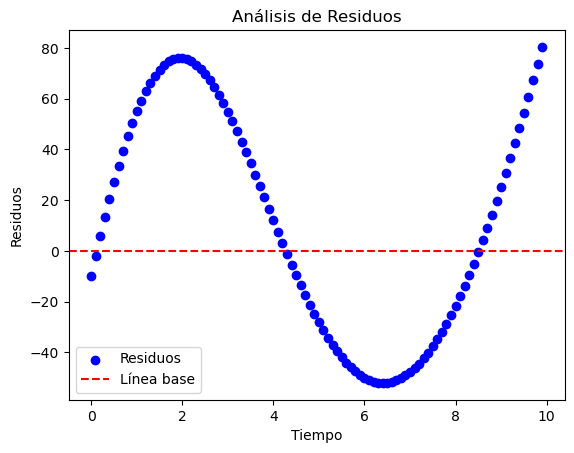

In [94]:
residuos = poblaciones_reales - fitted_curve

# Visualizar los residuos
plt.scatter(tiempos_reales, residuos, color='blue', label='Residuos')
plt.axhline(y=0, color='red', linestyle='--', label='Línea base')

plt.xlabel('Tiempo')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos')
plt.legend()
plt.show()

#### Error Cuadrático Medio (MSE) y el Coeficiente de Determinación para Metodos de Minimos Cuadrados

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

# Función que representa la ecuación diferencial del modelo Gompertz
def gompertz_model(N, t, r, K):
    if N <= 0:
        return 0
    else:
        dNdt = -r * N * np.log(N / K)
        return dNdt

# Condiciones iniciales
N0 = 10  # Tamaño inicial de la población

# Parámetros del modelo Gompertz primero
true_r = 0.3
true_K = 1000

# Rango de tiempo
t_span = (0, 10)

# Resolver la ecuación diferencial de forma numérica
def integrate_gompertz(r, K, t_eval):
    N = np.zeros_like(t_eval)
    N[0] = N0
    for i in range(1, len(t_eval)):
        dt = t_eval[i] - t_eval[i-1]
        N[i] = N[i-1] + gompertz_model(N[i-1], t_eval[i-1], r, K) * dt
    return N

# Generar puntos en el tiempo para la visualización
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Datos Reales (t, N)
datos_reales = np.array([(i / 10, i * 10) for i in range(100)])
tiempos_reales, poblaciones_reales = zip(*datos_reales)

# Definir la función objetivo para mínimos cuadrados
def objective_function(params, t, data, t_eval):
    r, K = params
    fitted_curve = integrate_gompertz(r, K, t_eval)
    return fitted_curve - data

# Estimación inicial de los parámetros
initial_params = [0.1, 500]

# Minimizar la función objetivo utilizando least_squares
result = least_squares(objective_function, initial_params, args=(tiempos_reales, poblaciones_reales, t_eval))

# Obtener los parámetros ajustados
params = result.x

# Generar la curva ajustada
fitted_curve = integrate_gompertz(*params, t_eval)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(poblaciones_reales, fitted_curve)

# Calcular el Coeficiente de Determinación (R^2)
r2 = r2_score(poblaciones_reales, fitted_curve)
print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R^2):", r2)

Error Cuadrático Medio (MSE): 2265.402728984348
Coeficiente de Determinación (R^2): 0.9728124484970375


Parecido Coeficiente de Determinación y el metodo cuadratico mayor error cuadratico medio. El coeficiente de determinación es cercano a 1.

Error Cuadrático Medio (MSE):

El MSE mide el promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales.
Cuanto menor sea el MSE, mejor será el ajuste del modelo a los datos.
En tu caso, el MSE es 2265.40, lo que indica que hay un error promedio cuadrático de aproximadamente 2265 unidades entre las predicciones del modelo y los datos reales. La cantidad 2265.40 es relativo ya que no es lo mismo error en millones de habitantes, cm^3, cm o km. Dependiendo de la unidad de trabajo. En esta caso tamaño del tumor. Puede ser un error muy considerable.

Coeficiente de Determinación (R^2):

El R^2 proporciona una medida de qué tan bien las predicciones del modelo se ajustan a los valores reales.
Varía entre 0 y 1, donde 1 indica un ajuste perfecto.
Un valor de R^2 cercano a 1 sugiere que el modelo explica bien la variabilidad en los datos.
En este caso , el R^2 es 0.9728, lo que indica que el modelo explica aproximadamente el 97.28% de la variabilidad en los datos, lo cual es excelente.

#### Metodo de Residuos para Metodo de Minimos Cuadrados

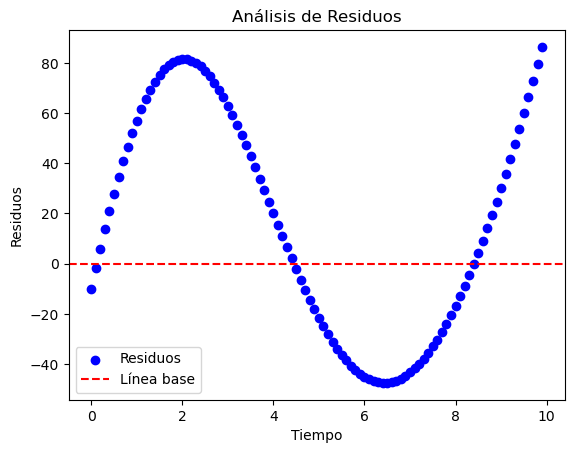

In [96]:
residuos = poblaciones_reales - fitted_curve

# Visualizar los residuos
plt.scatter(tiempos_reales, residuos, color='blue', label='Residuos')
plt.axhline(y=0, color='red', linestyle='--', label='Línea base')

plt.xlabel('Tiempo')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos')
plt.legend()
plt.show()

Se puede ver que son parametros muy parecidos las dos tecnicas. Y que la información  del t=2 y t=7 es bastante alejada de la realidad
sin embargo en el momento inicial y en los t=8,5 es bastante buena aprox.
En el caso de que hubiese algun punto en concreto que estuviese muy lejos de los demas habria que analizarlo.

#### Metodo Validación Cruzada para Curve_fit

MSE en conjunto de prueba: 1948.208864522537
Coeficiente de Determinación (R^2) en conjunto de prueba: 0.9756884149931673


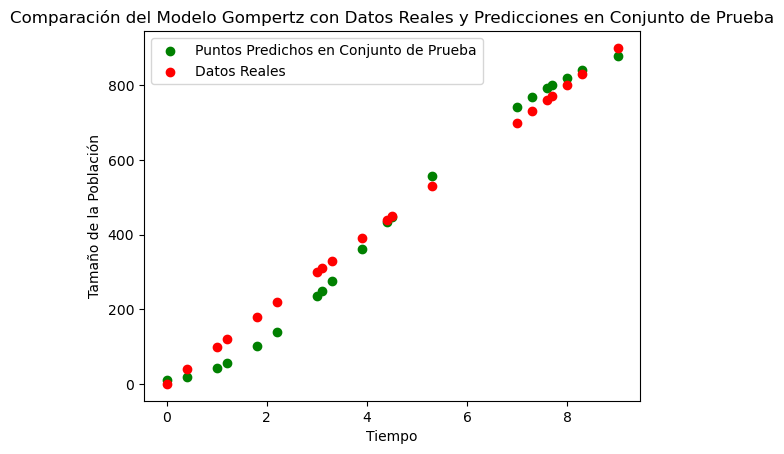

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Función que representa la ecuación diferencial del modelo Gompertz
def gompertz_model(t, N, r, K):
    if N <= 0:
        return 0
    else:
        dNdt = -r * N * np.log(N / K)
        return dNdt

# Condiciones iniciales
N0 = 10  # Tamaño inicial de la población

# Parámetros del modelo Gompertz primeros
true_r = 0.3
true_K = 1000

# Rango de tiempo
t_span = (0, 10)

# Resolver la ecuación diferencial utilizando solve_ivp para generar datos "reales"
solution = solve_ivp(gompertz_model, t_span, [N0], args=(true_r, true_K), dense_output=True)

# Generar puntos en el tiempo para la visualización
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Evaluar la solución en los puntos de tiempo para obtener la población en esos momentos
true_population_at_time_t_eval = solution.sol(t_eval)

# Datos Reales (t, N)
datos_reales = np.array([(i/10 , i * 10) for i in range(100)])
tiempos_reales, poblaciones_reales = zip(*datos_reales)

# Definir la función a ajustar con curve_fit
def gompertz_fit_function(t, r, K):
    N0 = 10  # Condiciones iniciales
    solution = solve_ivp(gompertz_model, t_span, [N0], args=(r, K), dense_output=True)
    return solution.sol(t)[0]


# Generar la curva ajustada
fitted_curve = gompertz_fit_function(t_eval, *params)
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(tiempos_reales, poblaciones_reales, test_size=0.2, random_state=42)

# Ajustar el modelo en el conjunto de entrenamiento
params_cross_val, _ = curve_fit(gompertz_fit_function, X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred_test = gompertz_fit_function(X_test, *params_cross_val)

# Calcular métricas en el conjunto de prueba
mse_cross_val = mean_squared_error(y_test, y_pred_test)
r2_cross_val = r2_score(y_test, y_pred_test)

# Imprimir métricas
print("MSE en conjunto de prueba:", mse_cross_val)
print("Coeficiente de Determinación (R^2) en conjunto de prueba:", r2_cross_val)
plt.scatter(X_test, y_pred_test, color='green', label='Puntos Predichos en Conjunto de Prueba')
plt.scatter(X_test, y_test, color='red', label='Datos Reales')
plt.xlabel('Tiempo')
plt.ylabel('Tamaño de la Población')
plt.title('Comparación del Modelo Gompertz con Datos Reales y Predicciones en Conjunto de Prueba')
plt.legend()
plt.show()

Lo cual indica menos error y mayor Coeficiente de determinación. Esto es predice bien los datos.
Esto indica que  modelo Gompertz ajustado generaliza bien a datos no vistos durante el entrenamiento. Estas métricas respaldan la eficacia del modelo en la predicción de nuevos datos

#### Metodo Validación Cruzada para el metodo de minimos cuadrados

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

# Función que representa la ecuación diferencial del modelo Gompertz
def gompertz_model(N, t, r, K):
    if N <= 0:
        return 0
    else:
        dNdt = -r * N * np.log(N / K)
        return dNdt

# Condiciones iniciales
N0 = 10  # Tamaño inicial de la población

# Parámetros del modelo Gompertz primero
true_r = 0.3
true_K = 1000

# Rango de tiempo
t_span = (0, 10)

# Resolver la ecuación diferencial de forma numérica para enseñar otra manera de resolver la ecuación diferencial
def integrate_gompertz(r, K, t_eval):
    N = np.zeros_like(t_eval)
    N[0] = N0
    for i in range(1, len(t_eval)):
        dt = t_eval[i] - t_eval[i-1]
        N[i] = N[i-1] + gompertz_model(N[i-1], t_eval[i-1], r, K) * dt
    return N

# Generar puntos en el tiempo para la visualización
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Datos Reales (t, N)
datos_reales = np.array([(i / 10, i * 10) for i in range(100)])
tiempos_reales, poblaciones_reales = zip(*datos_reales)

# Definir la función objetivo para mínimos cuadrados
def objective_function(params, t, data, t_eval):
    r, K = params
    fitted_curve = integrate_gompertz(r, K, t_eval)
    return fitted_curve - data

# Estimación inicial de los parámetros
initial_params = [0.3, 900]
X_train, X_test, y_train, y_test = train_test_split(tiempos_reales, poblaciones_reales, test_size=0.1, random_state=42)
# Minimizar la función objetivo utilizando least_squares
result = least_squares(objective_function, initial_params, args=(X_train, y_train, X_train))

# Obtener los parámetros ajustados
params = result.x
print(params)
# Generar la curva ajustada
fitted_curve = integrate_gompertz(*params, X_test)


from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, fitted_curve)

# Calcular el Coeficiente de Determinación (R^2)
r2 = r2_score(y_test, fitted_curve)
print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R^2):", r2)

[1.53325839e-03 6.75000751e+02]
Error Cuadrático Medio (MSE): 261945.39782954194
Coeficiente de Determinación (R^2): -2.652130358451034


Nos demuestra que predice muy mal.

Modelo Inadecuado: El modelo se esta utilizando (en este caso, el modelo Gompertz) puede no ser adecuado para describir los datos reales. Asegúrate de que el modelo elegido sea una representación precisa del fenómeno que estás tratando de modelar.

Parámetros Iniciales Incorrectos: La optimización de los parámetros depende de los valores iniciales. Si los valores iniciales son incorrectos, el algoritmo de optimización puede converger a mínimos locales en lugar del mínimo global.

Condiciones Iniciales Incorrectas: Para modelos de ecuaciones diferenciales, las condiciones iniciales son críticas. Asegúrate de que las condiciones iniciales sean correctas y reflejen adecuadamente el estado inicial del sistema.

Ruido en los Datos: Si hay ruido en los datos, especialmente si es significativo, puede afectar la capacidad del modelo para ajustarse correctamente.

Complejidad del Modelo: Ajustar un modelo muy complejo a un conjunto de datos pequeño puede conducir al sobreajuste. Asegúrate de que la complejidad del modelo sea adecuada para la cantidad de datos disponibles.

Validación Cruzada Insuficiente: Si se esta utilizando la  validación cruzada, hay que asegúrarse de de tener suficientes datos y particiones adecuadas para evaluar de manera confiable el rendimiento del modelo.

Problemas Numéricos: En la optimización numérica, problemas como la convergencia no garantizada o la elección de algoritmos subóptimos pueden afectar los resultados.

Es posible que se obtenga un buen rendimiento en el conjunto de prueba (como lo indica el bajo Error Cuadrático Medio (MSE) y el alto Coeficiente de Determinación (R^2)), pero la validación cruzada sea un desastre. Esto puede ocurrir por varias razones:

Sobreajuste: El  modelo podría estar sobreajustándose al conjunto de entrenamiento, lo que significa que se adapta demasiado a los detalles específicos de esos datos y no generaliza bien a datos no vistos. La validación cruzada puede exponer este sobreajuste al evaluar el modelo en diferentes particiones de los datos. Parece el caso

Variabilidad en los Datos: Si los datos tienen una alta variabilidad, la partición de los datos en conjuntos de entrenamiento y prueba podría afectar significativamente el rendimiento del modelo. En algunos casos, puede haber particiones específicas que resulten en un rendimiento pobre durante la validación cruzada. No parece el caso

Distribución de Datos: La forma en que se dividen los datos en conjuntos de entrenamiento y prueba durante la validación cruzada puede influir en los resultados. Si hay características específicas en ciertas porciones de los datos, una mala partición puede llevar a resultados subóptimos.